# Practice notebook for multivariate analysis using NHANES data

This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data.  These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

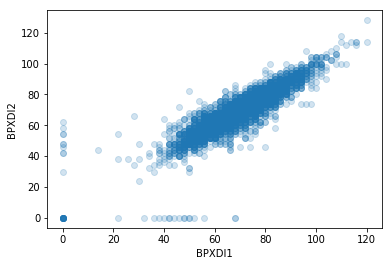

In [4]:
sns.regplot(da.BPXDI1,da.BPXDI2,scatter=True, scatter_kws={'alpha' : 0.2}, fit_reg=False)

In [9]:
print(da[['BPXSY1','BPXSY2']].corr())

print(da[['BPXDI1','BPXDI2']].corr())


          BPXSY1    BPXSY2
BPXSY1  1.000000  0.962287
BPXSY2  0.962287  1.000000
          BPXDI1    BPXDI2
BPXDI1  1.000000  0.884722
BPXDI2  0.884722  1.000000


In [10]:
print(da[['BPXSY1','BPXDI1']].corr())

print(da[['BPXSY2','BPXDI2']].corr())


          BPXSY1    BPXDI1
BPXSY1  1.000000  0.316531
BPXDI1  0.316531  1.000000
          BPXSY2    BPXDI2
BPXSY2  1.000000  0.303847
BPXDI2  0.303847  1.000000


__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

Very strong positive correlation between repeated measurements in each category.

__Q2a.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

A little less correlated

## Question 2

Log transform the four blood pressure variables and repeat question 1.

In [16]:
da_log = da[['BPXSY1','BPXSY2', 'BPXDI1','BPXDI2']].apply(lambda x: np.log(x), axis=0)

In [17]:
da_log.head()

,BPXSY1,BPXSY2,BPXDI1,BPXDI2
0,4.852030,4.820282,4.248495,4.158883
1,4.983607,4.941642,4.477337,4.477337
2,4.927254,4.882802,3.828641,3.784190
3,4.882802,4.897840,4.276666,4.219508
4,4.605170,4.736198,4.248495,3.988984


In [19]:
print(da[['BPXSY1','BPXSY2']].corr())

print(da[['BPXDI1','BPXDI2']].corr())


          BPXSY1    BPXSY2
BPXSY1  1.000000  0.962287
BPXSY2  0.962287  1.000000
          BPXDI1    BPXDI2
BPXDI1  1.000000  0.884722
BPXDI2  0.884722  1.000000


In [20]:
print(da[['BPXSY1','BPXDI1']].corr())

print(da[['BPXSY2','BPXDI2']].corr())

          BPXSY1    BPXDI1
BPXSY1  1.000000  0.316531
BPXDI1  0.316531  1.000000
          BPXSY2    BPXDI2
BPXSY2  1.000000  0.303847
BPXDI2  0.303847  1.000000


__Q2a.__ Does the correlation analysis on log tranformed data lead to any important insights that the correlation analysis on the untransformed data missed?

The data is normally distributed?

## Question 3

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

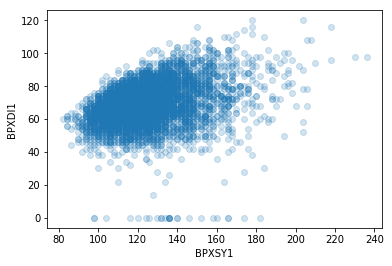

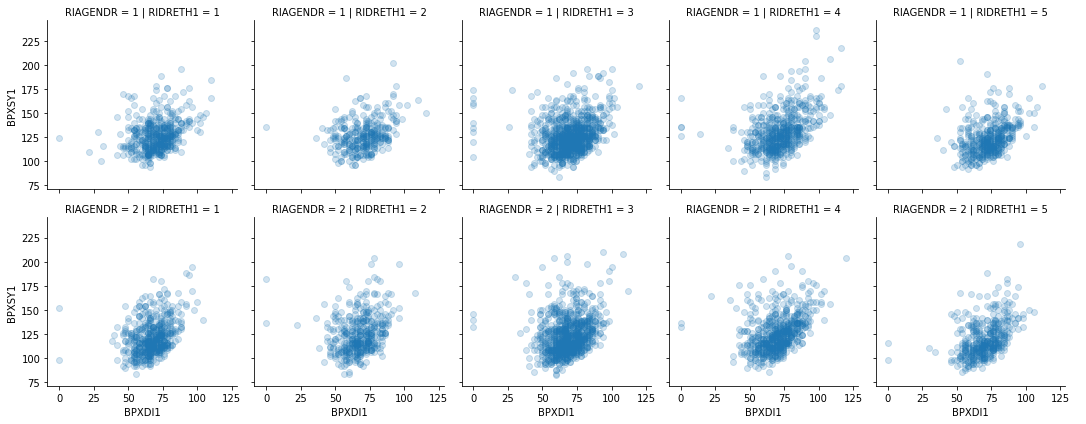

In [28]:
_ = sns.FacetGrid(da,row='RIAGENDR', col='RIDRETH1').map(plt.scatter,'BPXDI1','BPXSY1', alpha=0.2).add_legend()

__Q3a.__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

These are similarly correlated across gender, just female are having correlation w.r.t Ethenicity 1 and 2,4. 

## Question 4

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

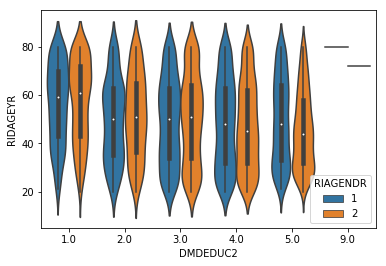

In [32]:
sns.violinplot(y='RIDAGEYR', x= 'DMDEDUC2', data=da, hue='RIAGENDR')

__Q4a.__ Comment on any evident differences among the age distributions in the different demographic groups.

Similar distribution of age across the educational attainment. Category 9 is showing a discerning age value between gender.

## Question 5

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

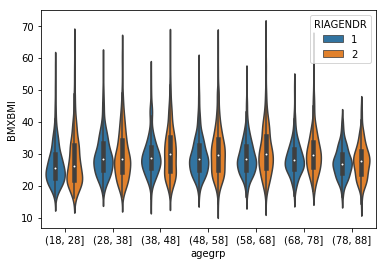

In [33]:
da["agegrp"] = pd.cut(da.RIDAGEYR,[18,28,38,48,58,68,78,88])
sns.violinplot(y='BMXBMI', x= 'agegrp', data=da, hue='RIAGENDR')

__Q5a.__ Comment on the trends in BMI across the demographic groups.

General trade with age BMI is increasing. Female tend to have a higher variance compared to the men. But in the age group 78 , this gap diminishes.

## Question 6

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [42]:
freq_tab = da.groupby(by=['RIDRETH1','HIQ210']).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis =1)

In [43]:
freq_tab.head()

HIQ210,1.0,2.0,9.0
RIDRETH1,,,
1,0.137982,0.857567,0.004451
2,0.128696,0.871304,0.000000
3,0.067354,0.931432,0.001214
4,0.108654,0.890385,0.000962
5,0.081761,0.915723,0.002516


In [45]:
pd.crosstab(da.RIDRETH1, da.HIQ210).apply(lambda x: x/x.sum(), axis =1)

HIQ210,1.0,2.0,9.0
RIDRETH1,,,
1,0.137982,0.857567,0.004451
2,0.128696,0.871304,0.000000
3,0.067354,0.931432,0.001214
4,0.108654,0.890385,0.000962
5,0.081761,0.915723,0.002516


__Q6a.__ Which ethnic group has the highest rate of being uninsured in the past year?